In [157]:
# Import all packages needed
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import json
from pathlib import Path
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from sklearn.metrics import r2_score 
from matplotlib.ticker import ScalarFormatter

In [158]:
# Import style.json
style_path: Path = Path.cwd().parent / 'style' / 'style.json'
with open(style_path, 'r') as f: # opens the style.json file
    style: dict = json.load(f) # loads as a dictionary object

In [159]:
# Loading Data (data file must be in the same directory as jupyter notebook)
# Import data from excel file
# TODO: replace filename with the name of your data file
raw_data_filename: str ='transfer_curve_AL_1_35L_1.txt'

# Tell program to read the data
raw_data: pd.DataFrame = pd.read_csv(raw_data_filename, sep="	") # read data into a pandas dataframe

# Output data
raw_data

,Unnamed: 0,vg,id_down,id_up,vd
0,0,-60,-1.073223e-06,-1.007499e-06,-60.0
1,1,-59,-1.093448e-06,-9.095607e-07,-60.0
2,2,-58,-1.091037e-06,-8.417916e-07,-60.0
3,3,-57,-1.046699e-06,-7.782218e-07,-60.0
4,4,-56,-1.003206e-06,-7.181270e-07,-60.0
...,...,...,...,...,...
60,60,0,-6.904713e-08,-7.073852e-08,-60.0
61,61,1,-7.087937e-08,-7.047356e-08,-60.0
62,62,2,-7.401794e-08,-7.175250e-08,-60.0
63,63,3,-8.013848e-08,-7.107612e-08,-60.0


In [160]:
# Data preprocessing specific to UV-Vis
#TODO: baseline correction?
# TODO: normalize as an option
def preprocess(data: pd.DataFrame, normalize: bool = False, baseline: bool = False):
    """Function that applies transformation to the dataframe which will make it ready for plotting. Note, this is specific to UV-Vis.
    """
    # square root of absolute value of id_down and id_up
    data['sqrt_id_down'] = np.sqrt(np.abs(data['id_down']))
    data['sqrt_id_up'] = np.sqrt(np.abs(data['id_up']))

    return data

# NOTE: change True to False if you don't want normalization or baseline correction
preprocessed_data: pd.DataFrame = preprocess(raw_data, True, True)
preprocessed_data

,Unnamed: 0,vg,id_down,id_up,vd,sqrt_id_down,sqrt_id_up
0,0,-60,-1.073223e-06,-1.007499e-06,-60.0,0.001036,0.001004
1,1,-59,-1.093448e-06,-9.095607e-07,-60.0,0.001046,0.000954
2,2,-58,-1.091037e-06,-8.417916e-07,-60.0,0.001045,0.000917
3,3,-57,-1.046699e-06,-7.782218e-07,-60.0,0.001023,0.000882
4,4,-56,-1.003206e-06,-7.181270e-07,-60.0,0.001002,0.000847
...,...,...,...,...,...,...,...
60,60,0,-6.904713e-08,-7.073852e-08,-60.0,0.000263,0.000266
61,61,1,-7.087937e-08,-7.047356e-08,-60.0,0.000266,0.000265
62,62,2,-7.401794e-08,-7.175250e-08,-60.0,0.000272,0.000268
63,63,3,-8.013848e-08,-7.107612e-08,-60.0,0.000283,0.000267


/var/folders/ff/8h_dksfn11xfp_fq0srryncc0000gn/T/ipykernel_68002/1046774758.py:49: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig("OFET_.svg", dpi=300, bbox_inches="tight")
/var/folders/ff/8h_dksfn11xfp_fq0srryncc0000gn/T/ipykernel_68002/1046774758.py:50: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig("OFET_.jpg", dpi=300, bbox_inches="tight")
/var/folders/ff/8h_dksfn11xfp_fq0srryncc0000gn/T/ipykernel_68002/1046774758.py:50: UserWarning: AutoMinorLocator does not work with logarithmic scale
  plt.savefig("OFET_.jpg", dpi=300, bbox_inches="tight")
/Users/stanl/opt/anaconda3/envs/spectrometry/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning: AutoMinorLocator does not work with logarithmic scale
  func(*args, **kwargs)
/Users/stanl/opt/anaconda3/envs/spectrometry/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: AutoMinorLocator does not work with logarithmic scale
  fig.canvas.p

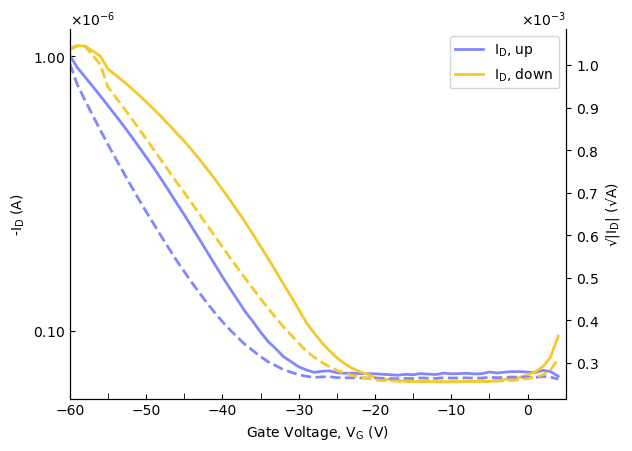

In [161]:
# Plot transfer curves
fig, ax = plt.subplots() # create a figure and axis object
ax2 = ax.twinx() # create a second y-axis that shares the same x-axis

# plot id_down and id_up
ax.plot(preprocessed_data['vg'], -preprocessed_data['id_up'], color=style["color"]["blue"], label="$\mathregular{I_{D}}$, up", linewidth=2, markersize=12) # plot id_up
ax.plot(preprocessed_data['vg'], -preprocessed_data['id_down'], color=style["color"]["yellow"], label="$\mathregular{I_{D}}$, down", linewidth=2, markersize=12) # plot id_down
ax.set_yscale('log')
ax.set_xlabel('Gate Voltage, $\mathregular{V_{G}}$ (V)') # x-axis label
ax.set_ylabel('-$\mathregular{I_{D}}$ (A)') # y-axis label

# Plot sqrt_id_down and sqrt_id_up
ax2.plot(preprocessed_data['vg'], preprocessed_data['sqrt_id_up'], color=style["color"]["blue"], label="id_up", linewidth=2, markersize=12, linestyle='dashed') # plot id_down
ax2.plot(preprocessed_data['vg'], preprocessed_data['sqrt_id_down'], color=style["color"]["yellow"], label="id_down", linewidth=2, markersize=12, linestyle='dashed') # plot id_down
ax2.set_ylabel('√|$\mathregular{I_{D}}$| (√A)') # y-axis label

ax.legend(loc="upper right") # legend for id_down and id_up

# y-axis and x-axis ticks
ax.xaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in X-axis
ax.yaxis.set_minor_locator(AutoMinorLocator(2)) # value of AutoMinorLocator dictates number of minor ticks between major ticks in Y-axis
ax.tick_params(axis="y", direction="in") # direction of major ticks in Y-axis
ax.tick_params(axis="x", direction="in") # direction of major ticks in X-axis
ax.tick_params(axis="y", which="minor", length=4, direction="in") # direction and length of minor ticks in Y-axis
ax.tick_params(axis="x", which="minor", length=4, direction="in") # direction and length of minor ticks in X-axis

# Set scientific notation for ticks
xfmt = ScalarFormatter()
xfmt.set_powerlimits((-3,3))
ax.yaxis.set_major_formatter(xfmt)
ax.yaxis.major.formatter._useMathText = True
xfmt = ScalarFormatter()
xfmt.set_powerlimits((-3,3))
ax2.yaxis.set_major_formatter(xfmt)
ax2.yaxis.major.formatter._useMathText = True
# ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
# ax2.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

# NOTE: User can change the x and y limits here
plt.xlim(-60, 5)

# NOTE: make sure you comment this out if you want to save your figure in the directory. Otherwise, your figure will look like a blank screen
# plt.show()

# Despines the figure
ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)

# Save the figure
# NOTE: User can change the filename
plt.savefig("OFET_.svg", dpi=300, bbox_inches="tight")
plt.savefig("OFET_.jpg", dpi=300, bbox_inches="tight")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
-2.528867834552389e-05 -0.00043795195775591387 -0.9999745955699575 2.661980602410645e-29 4.99956773892672e-08
0.9999491917853001


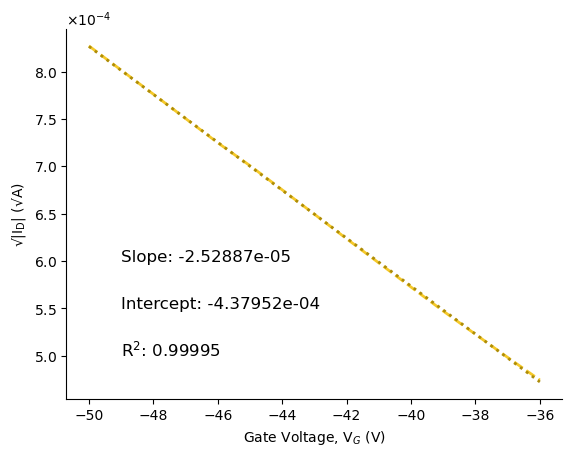

In [162]:
# Plot ID down saturation regimes of transfer curves
# Plot the fitted curve
fig, ax = plt.subplots() # create a figure and axis object

# TODO: input x values for the saturation regime
x0: float = -50
x1: float = -35
# find indicies of x values
idx0: int = preprocessed_data['vg'].sub(x0).abs().idxmin()
idx1: int = preprocessed_data['vg'].sub(x1).abs().idxmin()

# plot sqrt_id_down of linear saturation regime
ax.plot(preprocessed_data['vg'][idx0:idx1], preprocessed_data['sqrt_id_down'][idx0:idx1], color=style["color"]["yellow"], label="id_down", linewidth=2, markersize=12, linestyle="dashed") # plot sqrt_id_down
ax.set_ylabel('√|$\mathregular{I_{D}}$| (√A)') # y-axis label
ax.set_xlabel('Gate Voltage, V$_G$ (V)') # x-axis label

# calculate the fitted curve
slope_id_down, intercept, r_value, p_value, std_err = stats.linregress(preprocessed_data['vg'][idx0:idx1], preprocessed_data['sqrt_id_down'][idx0:idx1])
print(slope_id_down, intercept, r_value, p_value, std_err)
# get r2 of the fitted curve
r2 = r2_score(preprocessed_data['sqrt_id_down'][idx0:idx1], slope_id_down*preprocessed_data['vg'][idx0:idx1] + intercept)
print(r2)
# plot fitted curve
ax.plot(preprocessed_data['vg'][idx0:idx1], slope_id_down*preprocessed_data['vg'][idx0:idx1] + intercept, color=style["color"]["dark_yellow"], label="Fitted Curve", linewidth=2, markersize=12, linestyle=":") # plot fitted curve
# plot text box of slope, intercept, and R2
ax.text(x0+1, 0.0006, 'Slope: {:.5e}'.format(slope_id_down), fontsize=12)
ax.text(x0+1, 0.00055, 'Intercept: {:.5e}'.format(intercept), fontsize=12)
ax.text(x0+1, 0.0005, 'R$^2$: {:.5f}'.format(r2), fontsize=12)

# set y-axis ticks
xfmt = ScalarFormatter()
xfmt.set_powerlimits((-3,3))
ax.yaxis.set_major_formatter(xfmt)
ax.yaxis.major.formatter._useMathText = True

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig("OFET_down_saturation.svg", dpi=300, bbox_inches="tight")
plt.savefig("OFET_down_saturation.jpg", dpi=300, bbox_inches="tight")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.-3.0402264368432925e-05 -0.0008520154586161262 -0.9975068025232721 3.503120315803833e-22 5.069630248718347e-07
0.9950198210802024



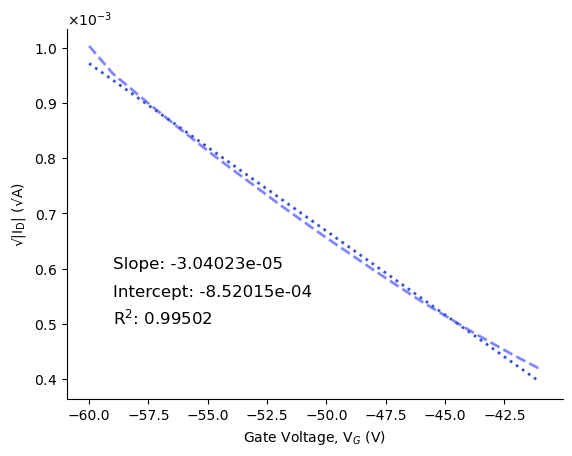

In [163]:
# Plot ID up saturation regimes of transfer curves
# Plot the fitted curve
fig, ax = plt.subplots() # create a figure and axis object

# TODO: input x values for the saturation regime
x0: float = -60
x1: float = -40
# find indicies of x values
idx0: int = preprocessed_data['vg'].sub(x0).abs().idxmin()
idx1: int = preprocessed_data['vg'].sub(x1).abs().idxmin()

# plot sqrt_id_down of linear saturation regime
ax.plot(preprocessed_data['vg'][idx0:idx1], preprocessed_data['sqrt_id_up'][idx0:idx1], color=style["color"]["blue"], label="id_up", linewidth=2, markersize=12, linestyle="dashed") # plot sqrt_id_down
ax.set_ylabel('√|$\mathregular{I_{D}}$| (√A)') # y-axis label
ax.set_xlabel('Gate Voltage, V$_G$ (V)') # x-axis label

# calculate the fitted curve
slope_id_up, intercept, r_value, p_value, std_err = stats.linregress(preprocessed_data['vg'][idx0:idx1], preprocessed_data['sqrt_id_up'][idx0:idx1])
print(slope_id_up, intercept, r_value, p_value, std_err)
# get r2 of the fitted curve
r2 = r2_score(preprocessed_data['sqrt_id_up'][idx0:idx1], slope_id_up*preprocessed_data['vg'][idx0:idx1] + intercept)
print(r2)
# plot fitted curve
ax.plot(preprocessed_data['vg'][idx0:idx1], slope_id_up*preprocessed_data['vg'][idx0:idx1] + intercept, color=style["color"]["dark_blue"], label="Fitted Curve", linewidth=2, markersize=12, linestyle=":") # plot fitted curve
# plot text box of slope, intercept, and R2
ax.text(x0+1, 0.0006, 'Slope: {:.5e}'.format(slope_id_up), fontsize=12)
ax.text(x0+1, 0.00055, 'Intercept: {:.5e}'.format(intercept), fontsize=12)
ax.text(x0+1, 0.0005, 'R$^2$: {:.5f}'.format(r2), fontsize=12)

# set y-axis ticks
xfmt = ScalarFormatter()
xfmt.set_powerlimits((-3,3))
ax.yaxis.set_major_formatter(xfmt)
ax.yaxis.major.formatter._useMathText = True

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.savefig("OFET_up_saturation.svg", dpi=300, bbox_inches="tight")
plt.savefig("OFET_up_saturation.jpg", dpi=300, bbox_inches="tight")

In [164]:
# When calculating the mobility, you will want to look at output curve (gradient ~ 0) and then draw the linear saturation regime from there. In addition, you will want to do triplicates.
# NOTE: change c, w, l
c: float = 1.15E-08 # (F/cm^2)
w: float = 0.1 # (cm)
l: float = 0.005 # (cm)

u_down: float = (2*l*(np.abs(slope_id_down)**2))/(c*w)
u_up: float = (2*l*(np.abs(slope_id_up)**2))/(c*w)

u_average: float = np.mean([u_down, u_up])
print(f"{u_down=}, {u_up=}, {u_average=}")

u_down=0.00556101958663799, u_up=0.008037371119374663, u_average=0.0067991953530063265
